## Import libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load dataset
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## DATA EXPLORATION

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df = pd.DataFrame(data)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Outcome Values:
    0 -- Non-diabetic
    1---Diabetic

In [8]:
data.shape

(768, 9)

## DATA CLEANING

In [9]:
# check for null values
def Null_values_found():
    null_values = data.isnull().sum()
    print(f'Number of null values found: \n {null_values}')

In [10]:
def duplicate_search():
    duplicates = data.duplicated().sum()
    print(f'{duplicates} duplicates found')

In [11]:
duplicate_search()

0 duplicates found


In [12]:
Null_values_found()

Number of null values found: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
# Replace all null values in BMI, Glucose, Skinthickness,
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

In [14]:
flattened_data = data.values.flatten()
flattened_data

array([  6.   , 148.   ,  72.   , ...,   0.315,  23.   ,   0.   ])

In [15]:
flattened_data = data.values.flatten()
column_names = data.columns.tolist()
column_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## DATA VISUALIZATION

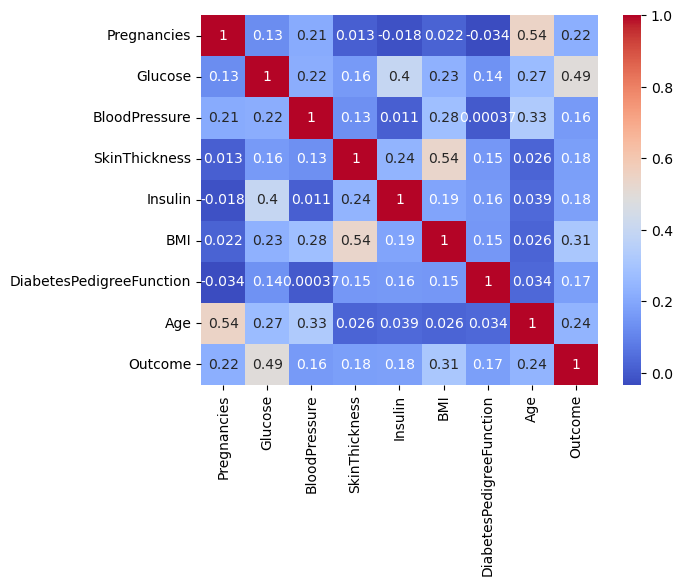

In [16]:
# Heat Map
sns.heatmap(data.corr() , annot = True, cmap='coolwarm')
plt.savefig('heatmap.png')
plt.show()

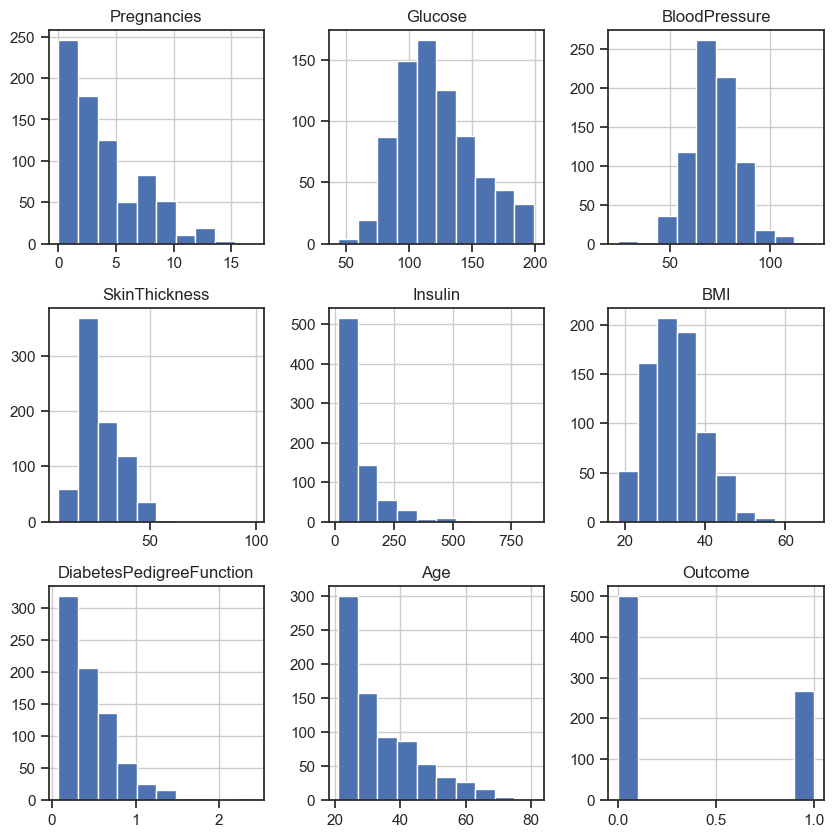

In [40]:
data.hist(bins =10, figsize=(10, 10))
plt.show()

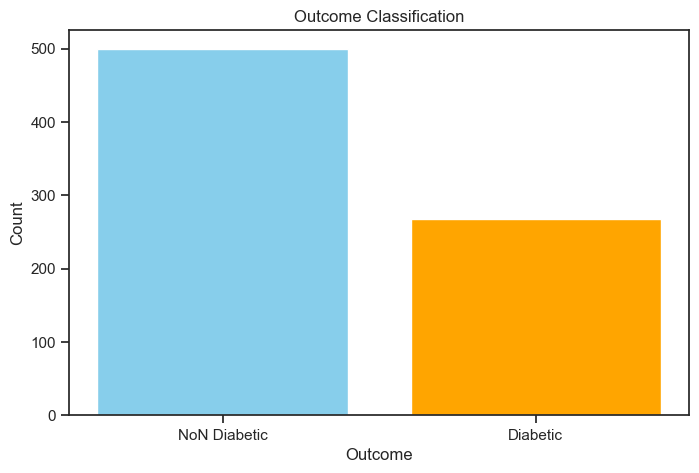

In [51]:
outcome_no = data['Outcome'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(outcome_no.index, outcome_no.values, color=['skyblue', 'orange'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(outcome_no.index, ['NoN Diabetic', 'Diabetic'])
plt.title('Outcome Classification')
plt.show()

In [65]:
outcome_no.index

Int64Index([0, 1], dtype='int64')

In [32]:
para = data.drop(columns = 'Outcome')

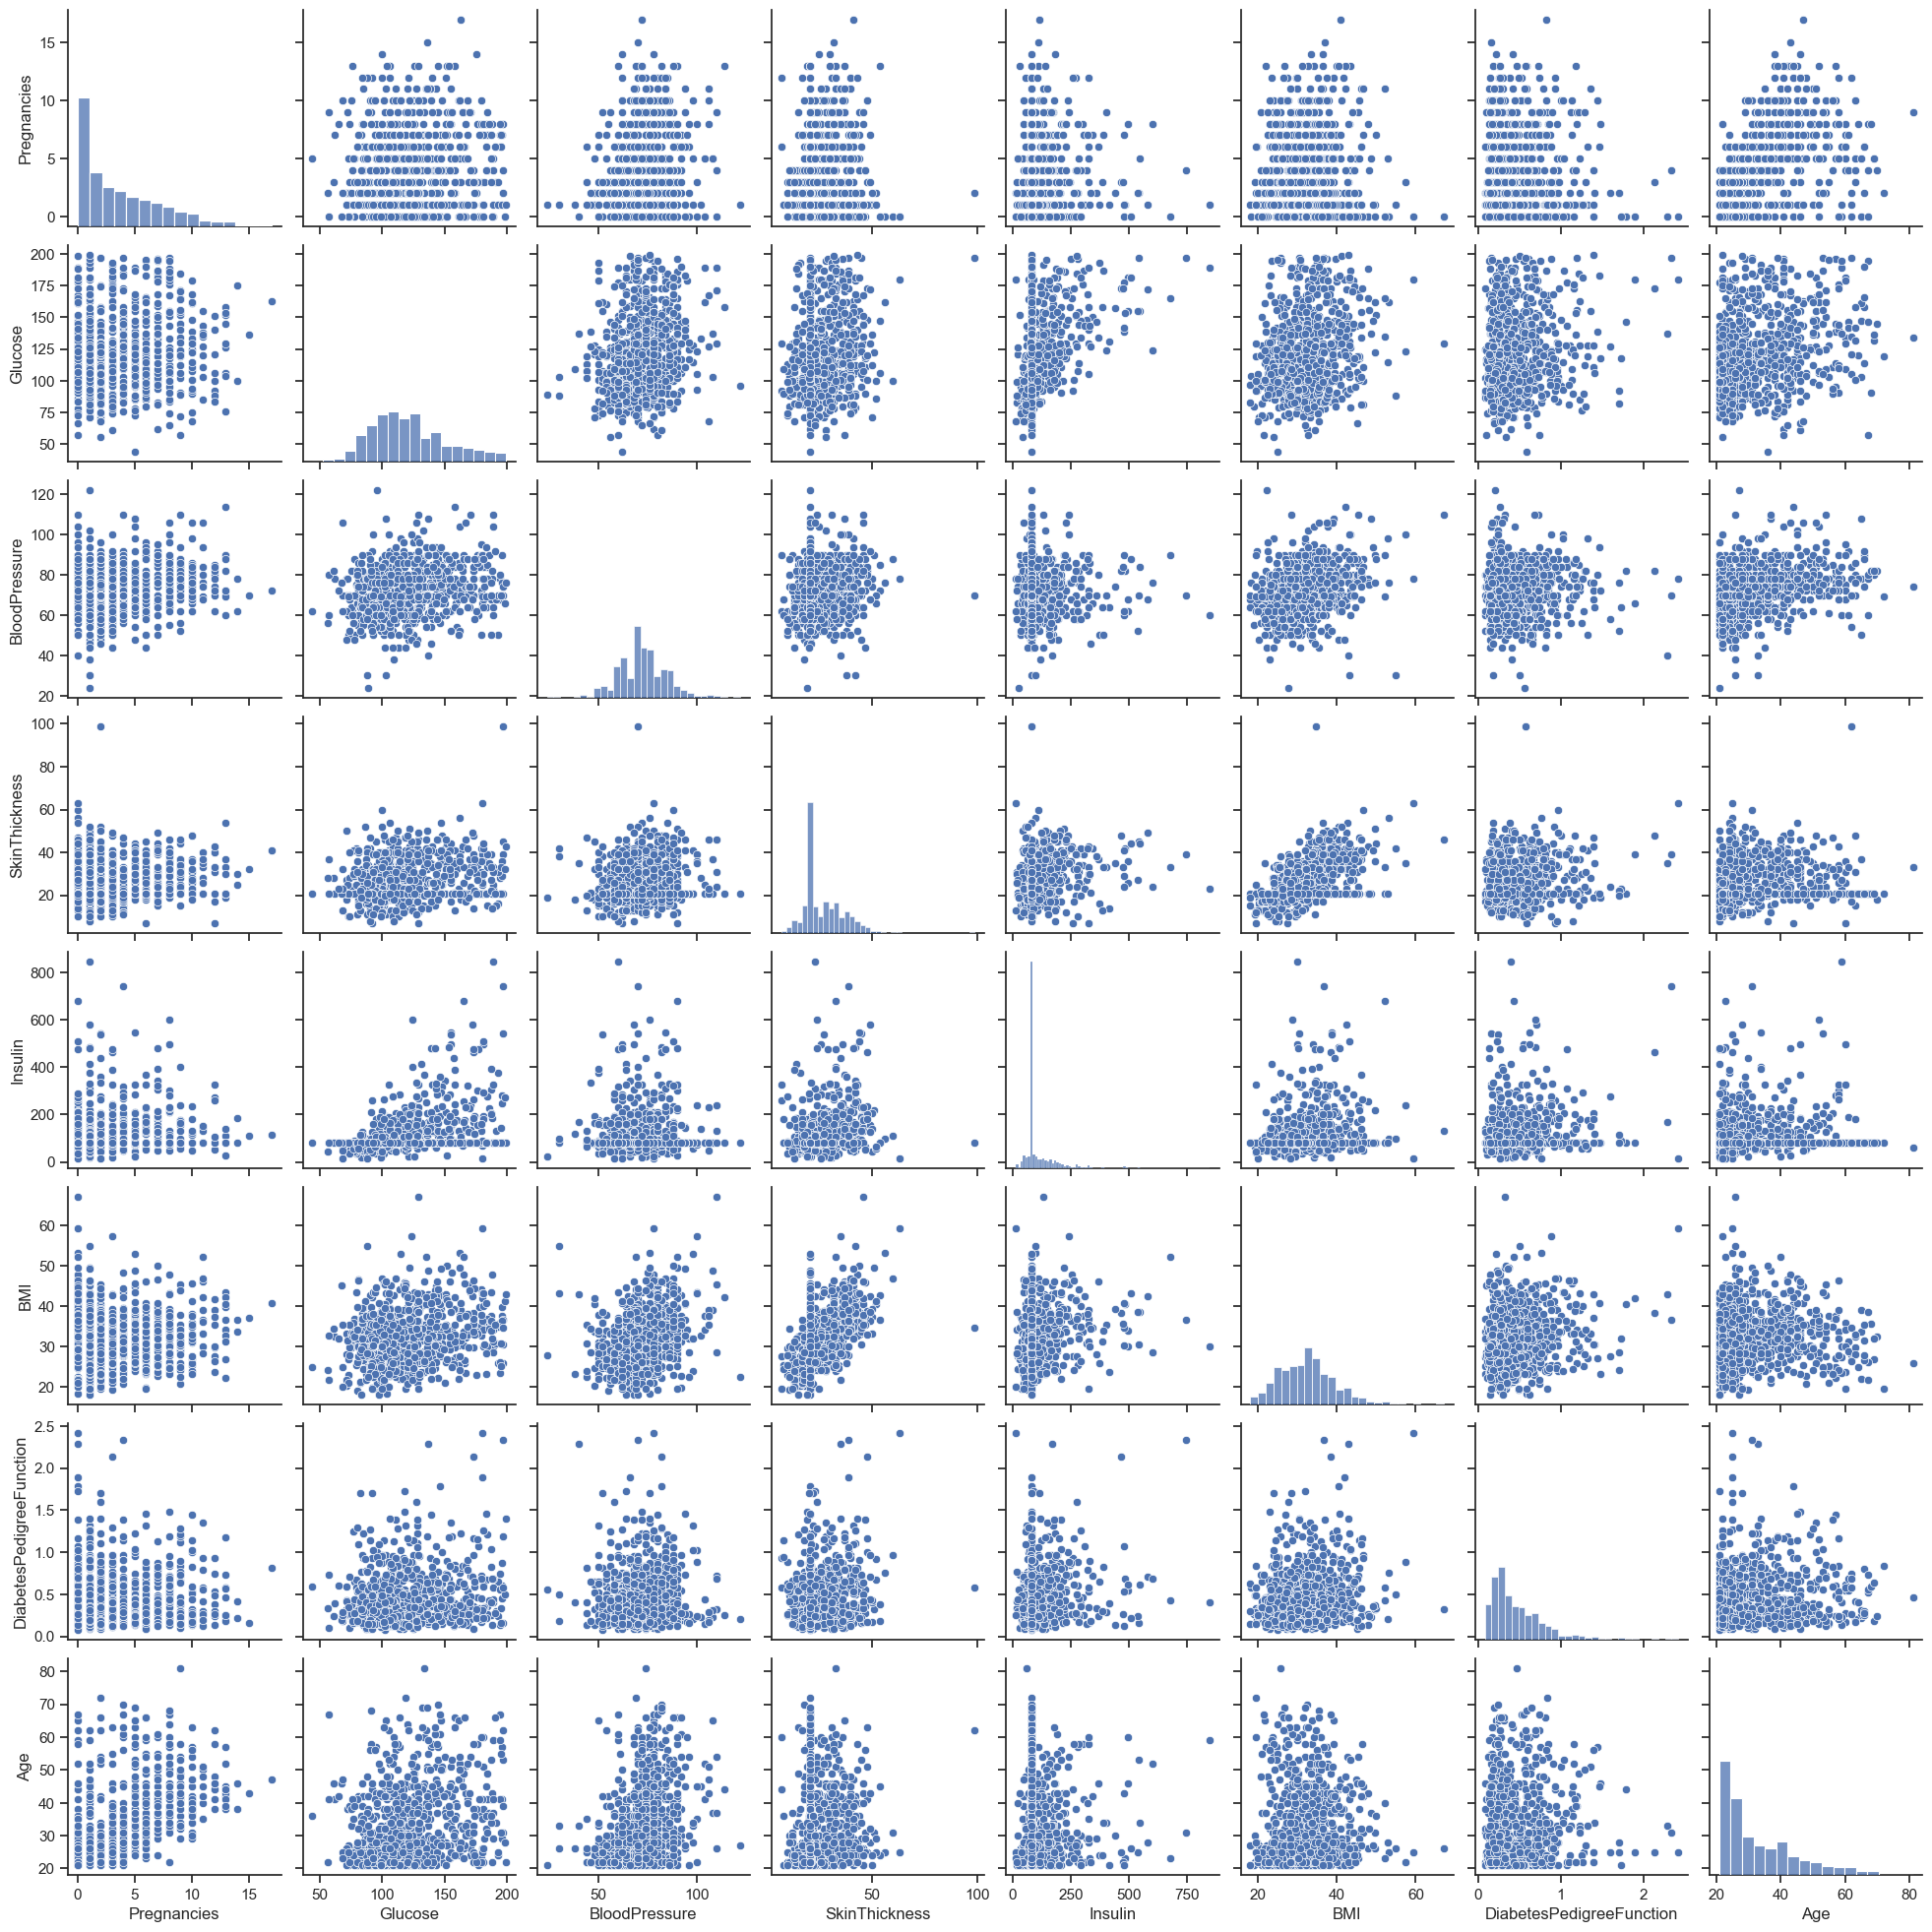

In [43]:
sns.set(style="ticks")
sns.pairplot(para, diag_kind='hist')

In [17]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


## DATA SHARING INTO INPUT & OUTPUT

In [19]:
# x is the input data
x = data.drop(columns = 'Outcome') #features
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [20]:
# y is the output data
y = data["Outcome"] # target
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## DATA STANDARDIZATION 

In [21]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [22]:
# Transform th data: getting columns in the same range
standardized_data = scaler.transform(x)
standardized_data

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [23]:
# replace data
x=standardized_data
y=data['Outcome']

## SPLITTING THE DATA INTO TRAINING AND TESTING

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [25]:
# checking the stats of train & test
x_train.shape, x_test.shape

((614, 8), (154, 8))

## TRAINING MODEL - SVM

In [26]:
classifier = svm.SVC(kernel = 'linear')

In [27]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

## PREDICTIONS

In [74]:
prediction_value = classifier.predict(x_test)

 ## ACCURACY TESTING

In [75]:
accuracy = accuracy_score(y_test, prediction_value)
accuracy =round(accuracy, 2)*100

In [76]:
print(f'This model is: {accuracy}% accurate')

This model is: 78.0% accurate


## DECISION TREE

In [77]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [78]:
Dt_prediction = clf.predict(x_test)

In [79]:
ACC = accuracy_score(y_test, Dt_prediction)
acc = round(ACC, 2)*100

In [80]:
print(f'Decision tree accuracy result is: {acc}%')

Decision tree accuracy result is: 67.0%


## CLASSIFIER ACCURACY COMPARISON

In [84]:
classifiers = ['SVM', 'Decision Tree']
values = [accuracy, acc]

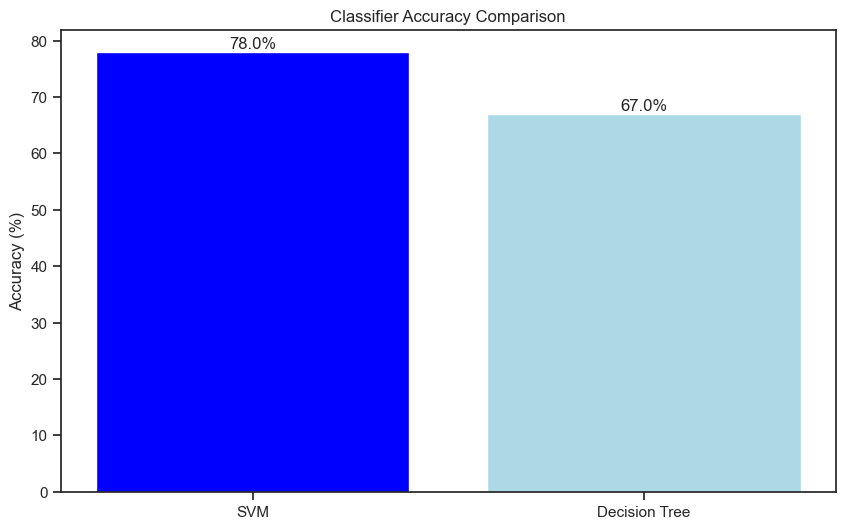

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(classifiers, values, color = ['blue', 'lightblue'])
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracy Comparison')
for i, v in enumerate(values):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')
plt.show()